# Kontrolna točka 2 - Replikacija rezultata

U ovoj Jupiter bilježnici tabularno i grafički predočujem rezultate dobivene replikacijom postupaka provođenih u radu.
- sav postupak/kod implementacije klasifikacije, treniranja i testiranja nalazi se u **ssk_modules/experiments.ipynb**
- rezultati (u izvornom obliku) izvođenja svih eksperimenata pohranjeni su u **data/**
- u ovoj bilježnici samo prezentiram dobivene rezultate te opisujem postupak kojim sam došla do njih

1. Datasetovi:
- U obzir smo uzeli tri klase - **earn**. **acq** i **crude**
- iz svake klase uzeli smo po **50** primjeraka nasumičnim odabirom - nismo uzimali u obzir dulljinu dokumenata ili neke druge karakteristike
- Iz takvog skupa stvorili smo **5 train/test** skupova u omjeru **80/20** koristeći [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

2. Izvođenje eksperimenta
- u svakom eksperimentu određene hiperparametre držimo konstantnima, dok variramo druge
- za svaku varijantu eksperimenta treniramo i testiramo model na svakom od 5 train/test skupova, te za metrike F1, Precision i Recall račnamo prosjek i standardnu devijaciju kroz skupove

## Eksperiment 1 - Variranje k (duljine podniza)


- &lambda; za SSK je konstantna = 0.5
- variramo k tj n za SSK i NGK

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
results=pd.read_csv("./data/exp1_5_iterations__3_classes__50_in_each_class.csv")
results=results.applymap(lambda x: '-' if str(x).lower() == 'nan' else x)
resultsagg = results.groupby(['Class', 'Kernel', 'k', 'lambda'],dropna=False).agg({'F1-Score': ['mean', 'std'], 'Precision': ['mean', 'std'], 'Recall': ['mean', 'std']}).reset_index()

# Rename the columns for clarity
resultsagg.columns = ['Class', 'Kernel', 'k', 'lambda', 'f1-mean', 'f1-std', 'P-mean', 'P-std', 'R-mean', 'R-std']
resultsagg=resultsagg.sort_values(by=['Class', 'Kernel', 'k', 'lambda']).reset_index(drop=True)
del resultsagg['lambda']
resultsagg['Class'] = resultsagg['Class'].replace({0: 'earn', 1: 'acq', 2: 'crude'})
resultsagg

,Class,Kernel,k,f1-mean,f1-std,P-mean,P-std,R-mean,R-std
0,earn,NGK,3.0,0.956725,0.046158,1.000000,0.000000,0.92,0.083666
1,earn,NGK,4.0,0.967251,0.049380,1.000000,0.000000,0.94,0.089443
2,earn,NGK,5.0,0.967251,0.049380,1.000000,0.000000,0.94,0.089443
3,earn,NGK,6.0,0.934503,0.046857,1.000000,0.000000,0.88,0.083666
4,earn,NGK,7.0,0.934503,0.046857,1.000000,0.000000,0.88,0.083666
5,earn,NGK,8.0,0.923977,0.032031,1.000000,0.000000,0.86,0.054772
6,earn,NGK,10.0,0.905029,0.024312,0.960000,0.054772,0.86,0.054772
7,earn,NGK,12.0,0.896575,0.049348,0.941414,0.084027,0.86,0.054772
8,earn,SSK,3.0,0.802828,0.072655,0.795000,0.087321,0.82,0.109545
9,earn,SSK,4.0,0.810620,0.076691,0.808636,0.083789,0.82,0.109545


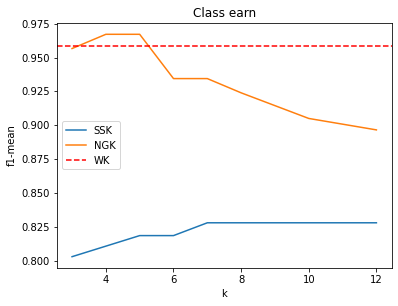

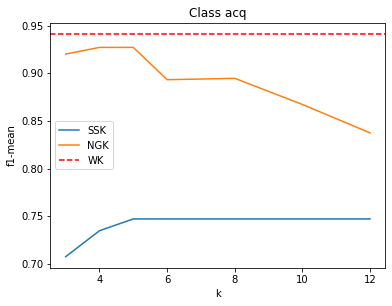

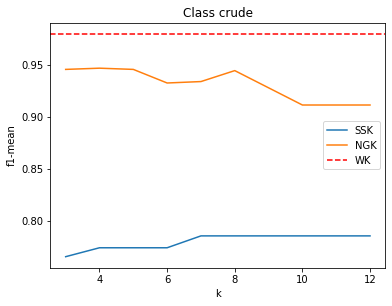

In [33]:
df=resultsagg
classes = df['Class'].unique()

for class_label in classes:
    class_data = df[df['Class'] == class_label]

    # Create a plot for the current class
    plt.figure(figsize=(6, 4.5))
    plt.title(f'Class {class_label}')
    plt.xlabel('k')
    plt.ylabel('f1-mean')

    # Plot a line for each kernel
    for kernel_label in ['SSK', 'NGK']:
        kernel_data = class_data[class_data['Kernel'] == kernel_label]
        plt.plot(kernel_data['k'], kernel_data['f1-mean'], label=kernel_label)
    
    wkvalue=class_data[class_data['Kernel']=='WK']['f1-mean'].item()
    plt.axhline(y=wkvalue, color='r', linestyle='--', label=f'WK')

    plt.legend()
    plt.show()

## Eksperiment 2 - Variranje lambda (faktor pada težine)

- k tj n za SSK i NGK je konstantan = 5
- variramo &lambda; za SSK

In [34]:
results=pd.read_csv("./data/exp2_5_iterations__3_classes__50_in_each_class.csv")
results=results.applymap(lambda x: '-' if str(x).lower() == 'nan' else x)
resultsagg = results.groupby(['Class', 'Kernel', 'k', 'lambda'],dropna=False).agg({'F1-Score': ['mean', 'std'], 'Precision': ['mean', 'std'], 'Recall': ['mean', 'std']}).reset_index()

# Rename the columns for clarity
resultsagg.columns = ['Class', 'Kernel', 'k', 'lambda', 'f1-mean', 'f1-std', 'P-mean', 'P-std', 'R-mean', 'R-std']
resultsagg=resultsagg.sort_values(by=['Class', 'Kernel', 'k', 'lambda']).reset_index(drop=True)
del resultsagg['k']
resultsagg['Class'] = resultsagg['Class'].replace({0: 'earn', 1: 'acq', 2: 'crude'})
resultsagg

,Class,Kernel,lambda,f1-mean,f1-std,P-mean,P-std,R-mean,R-std
0,earn,NGK,-,0.967251,0.049380,1.000000,0.000000,0.94,0.089443
1,earn,SSK,0.01,0.751511,0.051439,0.701865,0.068915,0.82,0.109545
2,earn,SSK,0.03,0.762482,0.038132,0.737121,0.085442,0.80,0.070711
3,earn,SSK,0.05,0.805037,0.036898,0.807552,0.119302,0.82,0.083666
4,earn,SSK,0.07,0.808862,0.048417,0.796970,0.125561,0.84,0.089443
5,earn,SSK,0.09,0.807017,0.081425,0.781768,0.153591,0.86,0.114018
6,earn,SSK,0.1,0.825892,0.025991,0.813846,0.106052,0.86,0.114018
7,earn,SSK,0.3,0.829930,0.055095,0.789301,0.067386,0.88,0.083666
8,earn,SSK,0.5,0.818413,0.079576,0.822273,0.077146,0.82,0.109545
9,earn,SSK,0.7,0.868254,0.097247,0.881818,0.110034,0.86,0.114018


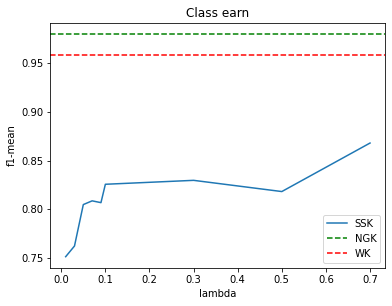

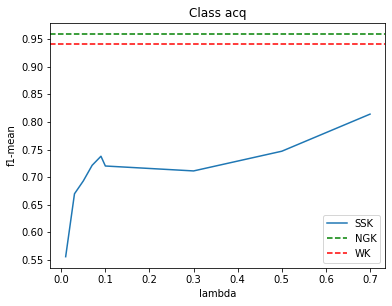

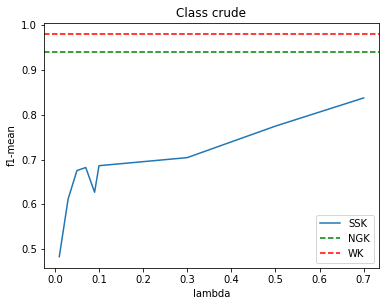

In [36]:
df=resultsagg
classes = df['Class'].unique()

for class_label in classes:
    class_data = df[df['Class'] == class_label]

    # Create a plot for the current class
    plt.figure(figsize=(6, 4.5))
    plt.title(f'Class {class_label}')
    plt.xlabel('lambda')
    plt.ylabel('f1-mean')

    ssk_data = class_data[class_data['Kernel'] == 'SSK']
    plt.plot(ssk_data['lambda'], ssk_data['f1-mean'], label='SSK')

    ngkkvalue=class_data[class_data['Kernel']=='NGK']['f1-mean'].item()
    plt.axhline(y=wkvalue, color='g', linestyle='--', label=f'NGK')
    
    wkvalue=class_data[class_data['Kernel']=='WK']['f1-mean'].item()
    plt.axhline(y=wkvalue, color='r', linestyle='--', label=f'WK')


    plt.legend()
    plt.show()

## Eksperiment 3 - Kombinacija dviju SSK s različitim k

- performanske jezgre koja je broj dviju SSK s različitim k - k1 i k2
- &lambda; je konstanta za obje SSK = 0.5
- variramo kombinacije (k1, k2)

In [5]:
results=pd.read_csv("./data/exp3_5_iterations__3_classes__50_in_each_class.csv")
results=results.applymap(lambda x: '-' if str(x).lower() == 'nan' else x)
resultsagg = results.groupby(['Class', 'Kernel', 'k', 'lambda'],dropna=False).agg({'F1-Score': ['mean', 'std'], 'Precision': ['mean', 'std'], 'Recall': ['mean', 'std']}).reset_index()

# Rename the columns for clarity
resultsagg.columns = ['Class', 'Kernel', 'k1, k2', 'lambda', 'f1-mean', 'f1-std', 'P-mean', 'P-std', 'R-mean', 'R-std']
resultsagg=resultsagg.sort_values(by=['Class', 'Kernel', 'k1, k2', 'lambda']).reset_index(drop=True)
del resultsagg['lambda']
resultsagg['Class'] = resultsagg['Class'].replace({0: 'earn', 1: 'acq', 2: 'crude'})
resultsagg

,Class,Kernel,"k1, k2",f1-mean,f1-std,P-mean,P-std,R-mean,R-std
0,earn,SSK k comb,"(3, 4)",0.802828,0.072655,0.795000,0.087321,0.82,0.109545
1,earn,SSK k comb,"(3, 5)",0.810620,0.076691,0.808636,0.083789,0.82,0.109545
2,earn,SSK k comb,"(3, 6)",0.810620,0.076691,0.808636,0.083789,0.82,0.109545
3,acq,SSK k comb,"(3, 4)",0.721871,0.067711,0.748333,0.086683,0.70,0.070711
4,acq,SSK k comb,"(3, 5)",0.734737,0.084915,0.751111,0.091826,0.72,0.083666
5,acq,SSK k comb,"(3, 6)",0.734737,0.084915,0.751111,0.091826,0.72,0.083666
6,crude,SSK k comb,"(3, 4)",0.774686,0.083932,0.778077,0.119692,0.78,0.083666
7,crude,SSK k comb,"(3, 5)",0.774686,0.083932,0.778077,0.119692,0.78,0.083666
8,crude,SSK k comb,"(3, 6)",0.774686,0.083932,0.778077,0.119692,0.78,0.083666


## Eksperiment 4 - Kombinacija SSK i NGK

- performanse jezgre koja je težinski zbroj SSK i NGK : wssk\*SSK + wngk\*NGK
- k tj n je konstantan = 5, &lambda; za SSK je isto konstantna = 0.5
- variramo wssk i wngk 

In [6]:
results=pd.read_csv("./data/exp4_5_iterations__3_classes__50_in_each_class.csv")
results=results.applymap(lambda x: '-' if str(x).lower() == 'nan' else x)
resultsagg = results.groupby(['Class', 'Kernel',"wngk, wssk", 'k', 'lambda'],dropna=False).agg({'F1-Score': ['mean', 'std'], 'Precision': ['mean', 'std'], 'Recall': ['mean', 'std']}).reset_index()

# Rename the columns for clarity
resultsagg.columns = ['Class', 'Kernel', 'wn, ws', 'k','lambda', 'f1-mean', 'f1-std', 'P-mean', 'P-std', 'R-mean', 'R-std']
resultsagg=resultsagg.sort_values(by=['Class', 'Kernel', 'wn, ws', 'lambda']).reset_index(drop=True)
del resultsagg['lambda']
del resultsagg['k']
resultsagg['Class'] = resultsagg['Class'].replace({0: 'earn', 1: 'acq', 2: 'crude'})
resultsagg

,Class,Kernel,"wn, ws",f1-mean,f1-std,P-mean,P-std,R-mean,R-std
0,earn,SSK NGK comb,"(0, 1)",0.818413,0.079576,0.822273,0.077146,0.82,0.109545
1,earn,SSK NGK comb,"(0.5, 0.5)",0.827886,0.093346,0.842273,0.108802,0.82,0.109545
2,earn,SSK NGK comb,"(0.6, 0.4)",0.827886,0.093346,0.842273,0.108802,0.82,0.109545
3,earn,SSK NGK comb,"(0.7, 0.3)",0.827886,0.093346,0.842273,0.108802,0.82,0.109545
4,earn,SSK NGK comb,"(0.8, 0.2)",0.827886,0.093346,0.842273,0.108802,0.82,0.109545
5,earn,SSK NGK comb,"(0.9, 0.1)",0.827886,0.093346,0.842273,0.108802,0.82,0.109545
6,earn,SSK NGK comb,"(1, 0)",0.967251,0.049380,1.000000,0.000000,0.94,0.089443
7,acq,SSK NGK comb,"(0, 1)",0.747118,0.083077,0.756566,0.088791,0.74,0.089443
8,acq,SSK NGK comb,"(0.5, 0.5)",0.747118,0.083077,0.756566,0.088791,0.74,0.089443
9,acq,SSK NGK comb,"(0.6, 0.4)",0.747118,0.083077,0.756566,0.088791,0.74,0.089443


## Eksperiment 5 - Kombinacija dviju SSK s različitim &lambda;

- performanse jezgre koja je zbroj dviju SSK jezgri s različitim &lambda; - &lambda;1 i &lambda;2
- k tj n je konstantan = 5, 
- variramo &lambda;1 i &lambda;2

In [7]:
results=pd.read_csv("./data/exp5_5_iterations__3_classes__50_in_each_class.csv")
results=results.applymap(lambda x: '-' if str(x).lower() == 'nan' else x)
resultsagg = results.groupby(['Class', 'Kernel', 'k', 'lambdas'],dropna=False).agg({'F1-Score': ['mean', 'std'], 'Precision': ['mean', 'std'], 'Recall': ['mean', 'std']}).reset_index()

# Rename the columns for clarity
resultsagg.columns = ['Class', 'Kernel', 'k','lambdas', 'f1-mean', 'f1-std', 'P-mean', 'P-std', 'R-mean', 'R-std']
resultsagg=resultsagg.sort_values(by=['Class', 'Kernel', 'lambdas']).reset_index(drop=True)
del resultsagg['k']
resultsagg['Class'] = resultsagg['Class'].replace({0: 'earn', 1: 'acq', 2: 'crude'})
resultsagg

,Class,Kernel,lambdas,f1-mean,f1-std,P-mean,P-std,R-mean,R-std
0,earn,SSK lambda comb,"0.05,0",0.805037,0.036898,0.807552,0.119302,0.82,0.083666
1,earn,SSK lambda comb,"0.05,0.5",0.818413,0.079576,0.822273,0.077146,0.82,0.109545
2,earn,SSK lambda comb,"0.5,0",0.818413,0.079576,0.822273,0.077146,0.82,0.109545
3,acq,SSK lambda comb,"0.05,0",0.693313,0.094683,0.698918,0.046375,0.70,0.158114
4,acq,SSK lambda comb,"0.05,0.5",0.747118,0.083077,0.756566,0.088791,0.74,0.089443
5,acq,SSK lambda comb,"0.5,0",0.747118,0.083077,0.756566,0.088791,0.74,0.089443
6,crude,SSK lambda comb,"0.05,0",0.675292,0.067410,0.734744,0.190631,0.66,0.114018
7,crude,SSK lambda comb,"0.05,0.5",0.774686,0.083932,0.778077,0.119692,0.78,0.083666
8,crude,SSK lambda comb,"0.5,0",0.774686,0.083932,0.778077,0.119692,0.78,0.083666


## SSK - poboljšanje
Mogući razlozi zašto SSK nije dao bolje rezultate od NGK i WK?
- primarno - impementacija ssk (korištena kod računanje train i test Gram matrica za SVM klasifikator) **ne normalizirta ssk score**, tj ne uzima u obzir duljine dokumenata, dok su implementacije WK i NGK koristile nomalizaciju
- uzeti veći dataset u obzir